## Fraud Detection in Credit Card Transactions using ML Techniques
*Oladimeji Salau*  
https://github.com/dimtics

### Introduction
The objective in this project is to build machine learning models to classify or identify fraudulent card transactions from a given card transactions data.  

### Data Description

The [dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud/data) contains two-days credit card transactions made in September 2013 by European cardholders. The dataset is highly unbalanced with a low percentage of fraudulent transactions within several records of normal transactions. The positive class (frauds) account for 0.172% (492 frauds out of 284,807 transactions) of all transactions.

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.  Feature 'Class' is the target variable with value 1 in case of fraud and 0 otherwise. 

### Import Libraries

In [1]:
# Import basic libraries 
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sn
sn.set()

# scikit packages
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

### Load Data  
The dataset used in this project is freely available at: https://www.kaggle.com/mlg-ulb/creditcardfraud/data

In [2]:
df = pd.read_csv("data/creditcard.csv")

In [3]:
# View top 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [5]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Separate feature data from target class

In [6]:
# feature data
X = df.iloc[:, :-1]

# target class
y = df['Class']

### Standardize data
Scale the data to have zero mean and 1 standard deviation

In [7]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Principal Components Analysis
The dataset has 31 features or dimensions including the class label. We will reduce the dimensions of the dataset using Principal Components Analysis (PCA) as implemented in scikit learn. We will first decide the number of significant components that can represent the whole dataset without losing too much information.

### Scree Plot
This is to show the relevant components that can be selected to represent the dataset.

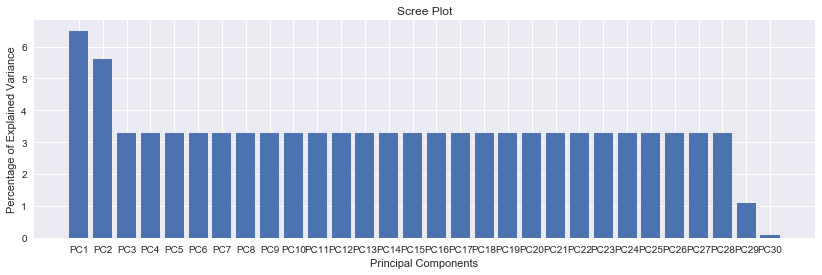

In [8]:
pca = PCA()
pca.fit(scaled_X)
pca_data = pca.transform(scaled_X)
pca_score = np.round(pca.explained_variance_ratio_*100, 1)
labels = ['PC'+ str(x) for x in range(1, len(pca_score)+1)]


fig, ax = plt.subplots(figsize=(14, 4))
plt.bar(x=range(1, len(pca_score)+1), height=pca_score, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

From  the plot, significant variations are along the PC1 and PC2 components. Hence, the two components can be used to represent the feature data without losing too much information.

### Select relevant features and partition data into train and test sets

In [9]:
# define PCA model instance and use it to fit and transform feature data 
pca = PCA(n_components=2)
pca_data = pca.fit(scaled_X)
tran_X = pca.transform(scaled_X)

In [10]:
# Partition data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tran_X, y, test_size=0.33, random_state=42)

### Train Models

In [11]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(class_weight=None, random_state=0)
RDF_Classifier.fit(X_train, y_train);

### Evaluate Models

In [12]:
# Evaluate models
models = []
models.append(('RandomForest Classifier', RDF_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()



============================== RandomForest Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9982601387958484

Model Accuracy:
 0.9995283513258568

Confusion Matrix:
 [[190477      0]
 [    90    253]]


============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.998202495318351

Model Accuracy:
 0.9982024944974321

Confusion Matrix:
 [[190477      0]
 [   343      0]]



### Test Models


============================== RandomForest Classifier Model Test Results ==============================

Model Accuracy:
 0.9984572334471788

Confusion Matrix:
 [[93833     5]
 [  140     9]]



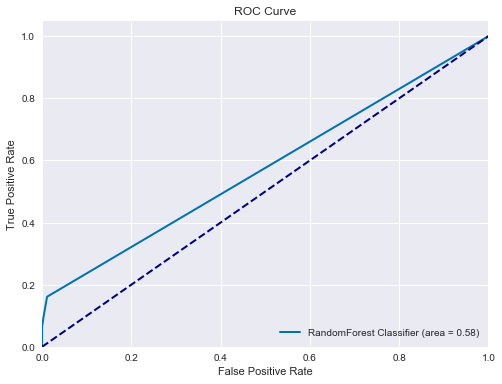

ROC_AUC:
 None


============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.9984146743698596

Confusion Matrix:
 [[93838     0]
 [  149     0]]



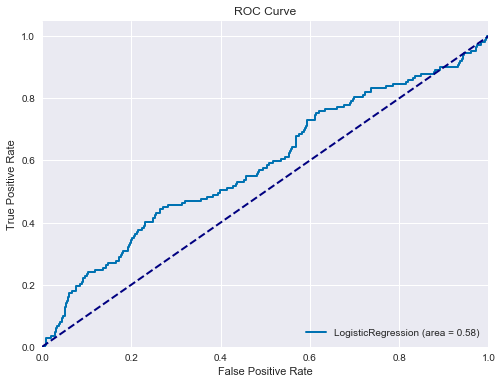

ROC_AUC:
 None



In [13]:
# Test models
sn.set_palette("colorblind")

def plot_roc_auc(i):
    "a function to plot roc_auc"
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(fpr, tpr,lw=2, label= i + ' (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    y_score = v.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score) #
    roc_auc = metrics.auc(fpr, tpr)
    
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("ROC_AUC:" "\n", plot_roc_auc(i))
    print()  